# Make external packages available
from numpy import *
import matplotlib
%pylab inline
import sys
import os
from astropy.io import ascii


The above sets up python libraries that make the routines that we use work. Python comes with a (very) limited set of built-in features, and then uses libraries to allow it to do all sorts of truly impressive things - reading in data, plotting, statistics, etc.

Next thing, we read some ghosts data

In [3]:
gh_data = ascii.read('http://dept.astro.lsa.umich.edu/~ericbell/data/GHOSTS/M81/ngc3031-field15.newphoto_radec')

Now we have read in the dataset. Now we take the columns, and put them in handy arrays that are named reasonably. The columns are always the same, so you don't have to futz with the next 4 lines. Columns 1 and 2 are x and y on the detector (i.e., it's position in the picture that HST's digital camera took); you don't really need that right now so we don't bother to give it its own variables.

In [4]:
ra = gh_data['col5'][:]
dec = gh_data['col6'][:]
f606 = gh_data['col3'][:] # Magnitude in F606W filter (zeropoint - 2.5log10(flux@606nm))
f814 = gh_data['col4'][:] # Magnitude in F814W filter (zeropoint - 2.5log10(flux@814nm))

Now we make a color-magnitude diagram. One plots F606W-F814W magnitude along the x-axis (a color) as a proxy for temperature (using Wein's law). The y-axis is F814W magnitude, as a proxy for luminosity, but because they're magnitudes they're backwards :)

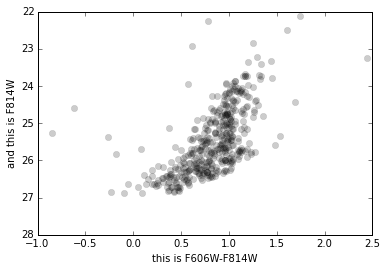

In [12]:
plot(f606-f814,f814, 'ko', alpha=0.20)   # alpha=0.05 is to make it partly transparent; 'ko' is a black circle
axis([-1,2.5,28,22])  # this sets up the axes, and the next one the labels
xlabel('this is F606W-F814W')
ylabel('and this is F814W')


Select bright stars (for the sake of argument), then plot all stars up, and overplot the bright ones up in ra/dec in blue (the equivalent of longitude and latitude on the sky) space. RA has the amusing convention of being plotted backwards (because you're on the inside of the celestial sphere looking out, sigh).

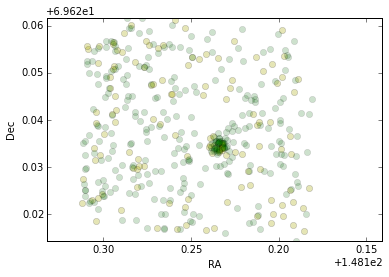

In [23]:
bright, = where(f814<25.0)
dim, = where(f814>25.0)
plot(ra,dec,'ko',alpha=0.05)
plot(ra[bright],dec[bright],'yo',alpha=0.25)
plot(ra[dim],dec[dim],'go',alpha=.15)
axis([max(ra)+0.02,min(ra)-.04,min(dec),max(dec)])
xlabel('RA')
ylabel('Dec')


Well, this is where you get to do your own thing. You can play with plotting colors, axis labels, overplot. You can make them two panel with subplot statements. You can download other fields by changing the file name to e.g., ngc3031-field01.newphoto_radec to 28 (i.e., there are 28 files). You can try to figure out what that little concentration of data points is at RA=148.325 Dec=69.65 by looking at the GHOSTS website. If you feel really enthusiastic, you can select stars near that object and plot their CMD, then the other stars not near that object and plot their CMD. You can try to find the red giant branch. Have a look at the Radburn-Smith data paper, or the GHOSTS website; see if you can reproduce some plots. You're doing research now :)

To add some text, or some python commands, go to 'insert' above, then insert cell below, and choose 'code' for python, or 'markdown' for this text stuff. To run the whole program, go to 'cell' and then select 'run all'. You now know as much as I do. 

So this is how you just type things?